In [1]:
# Import libraries
import os
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
join = os.path.join

In [ ]:
# Get working version of scikit-learn
!pip install scikit-learn==1.0

In [2]:
#filepath = "../"
filepath = "../data/tmp"

In [3]:
# Load baseline 2 data

video2_csv = "baseline2_videos.csv"
title2_npy = "title_embedd_2.npy"
caption2_csv = "caption_embedd_2.csv"
caption2_npy = "caption_embedd_2.npy"
comment2_csv = "comment_embedd_2.csv"
comment2_npy = "comments_embedd_2.npy"

df_video2 = pd.read_csv(join(filepath, video2_csv), sep='\t')
df_caption2 = pd.read_csv(join(filepath, caption2_csv))
df_comment2 = pd.read_csv(join(filepath, comment2_csv))
title2 = np.load(join(filepath, title2_npy), allow_pickle=True)
caption2 = np.load(join(filepath, caption2_npy), allow_pickle=True)
comment2 = np.load(join(filepath, comment2_npy), allow_pickle=True)

df_video2 = df_video2.set_index('video_id')

In [4]:
print(len(df_video2))
df_video2.head()

80


,Unnamed: 0,percentage_conspiracy,misinformation,title,number_comments,captions
video_id,,,,,,
0jmhj-vnl5E,1,0.175439,1,Is Wuhan virus a hit job? A whodunit not to mi...,114,good morning everybody this is Jeff J Browne C...
1cWvGnF6_dw,3,0.153846,1,The Book that Predicted the Wuhan Coronavirus:...,52,king at the bar book news or books teacher at ...
3DAI3c9wE0Q,4,0.225564,1,Prof. Francis Boyle Update on Coronavirus Bio...,1198,I think I found the smoking gun here uh there ...
4G1LTpm1pkw,6,0.128049,1,God says Coronavirus is NOT! 2020 by Warren...,164,the the coronavirus and what does the Lord say...
4tD0w86MTuA,7,0.058824,1,US BIOWARFARE Controlling speech Event 201...,34,okay here's an analysis of the infamous event ...


In [5]:
print(len(df_caption2))
df_caption2.head()

80


,Unnamed: 0,video_id,idx
0,0,0jmhj-vnl5E,0
1,1,1cWvGnF6_dw,1
2,2,3DAI3c9wE0Q,2
3,3,4G1LTpm1pkw,3
4,4,4tD0w86MTuA,4


In [6]:
print(len(df_comment2))
df_comment2.head()

111526


,Unnamed: 0,video_id,idx
0,0,0jmhj-vnl5E,0
1,1,0jmhj-vnl5E,1
2,2,0jmhj-vnl5E,2
3,3,0jmhj-vnl5E,3
4,4,0jmhj-vnl5E,4


In [7]:
print(title2.shape)
print(caption2.shape)
print(caption2[0].shape)
print(comment2.shape)
print(comment2[0].shape)

(80, 1, 768)
(80,)
(19, 768)
(111526,)
(1, 768)


In [8]:
caption2_concat = np.empty((0, 768))
video2_concat = np.empty(0)
for i in range(len(caption2)):
    caption2_concat = np.concatenate((caption2_concat, caption2[i]), axis=0)
    video_id = df_caption2.iloc[i]["video_id"]
    misinfo_label = df_video2.loc[video_id]["misinformation"]
    misinfo_values = np.array([misinfo_label for _ in range(caption2[i].shape[0])])
    video2_concat = np.concatenate((video2_concat, misinfo_values), axis=0)
print(caption2_concat.shape), print(video2_concat.shape)

(712, 768)
(712,)


(None, None)

In [9]:
comment2_concat = np.concatenate(comment2, axis=0)
print(comment2_concat.shape)

(112002, 768)


In [10]:
video2_concat_2 = []

for key, idx in df_comment2[['video_id', 'idx']].to_numpy():
    misinfo_label = df_video2.loc[key]["misinformation"]
    video2_concat_2 += [misinfo_label] * comment2[idx].shape[0]

video2_concat_2 = np.array(video2_concat_2)
print(comment2_concat.shape), print(video2_concat_2.shape)

(112002, 768)
(112002,)


(None, None)

#### Visualizing titles

In [11]:
title2 = title2.squeeze()
tsne = TSNE(n_components=2, learning_rate="auto", init="random")
X_embedded_title2 = tsne.fit_transform(title2)
X_embedded_title2.shape

(80, 2)

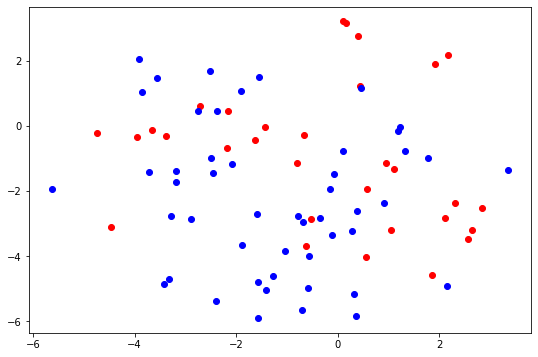

In [18]:
plt.rcParams["figure.figsize"] = (9, 6)
#plt.rcParams["figure.figsize"] = (15,15)

indices = df_video2["misinformation"].to_numpy()
misinfo = np.where(indices == 1)
non_misinfo = np.where(indices == 0)

plt.scatter(X_embedded_title2[misinfo, 0], X_embedded_title2[misinfo, 1], color='r')
plt.scatter(X_embedded_title2[non_misinfo, 0], X_embedded_title2[non_misinfo, 1], color='b')

plt.show()

#### Visualizing captions

In [13]:
tsne = TSNE(n_components=2, learning_rate="auto", init="random")
X_embedded_caption2 = tsne.fit_transform(caption2_concat)
X_embedded_caption2.shape

(712, 2)

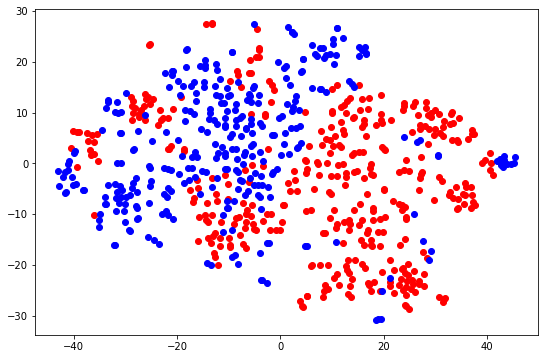

In [20]:
plt.rcParams["figure.figsize"] = (9, 6)
#plt.rcParams["figure.figsize"] = (15,15)

misinfo = np.where(video2_concat == 1)
non_misinfo = np.where(video2_concat == 0)

plt.scatter(X_embedded_caption2[misinfo, 0], X_embedded_caption2[misinfo, 1], color='r')
plt.scatter(X_embedded_caption2[non_misinfo, 0], X_embedded_caption2[non_misinfo, 1], color='b')

plt.show()

#### Visualizing comments

In [21]:
tsne = TSNE(n_components=2, learning_rate="auto", init="random")
X_embedded_comment2 = tsne.fit_transform(comment2_concat)
X_embedded_comment2.shape

(112002, 2)

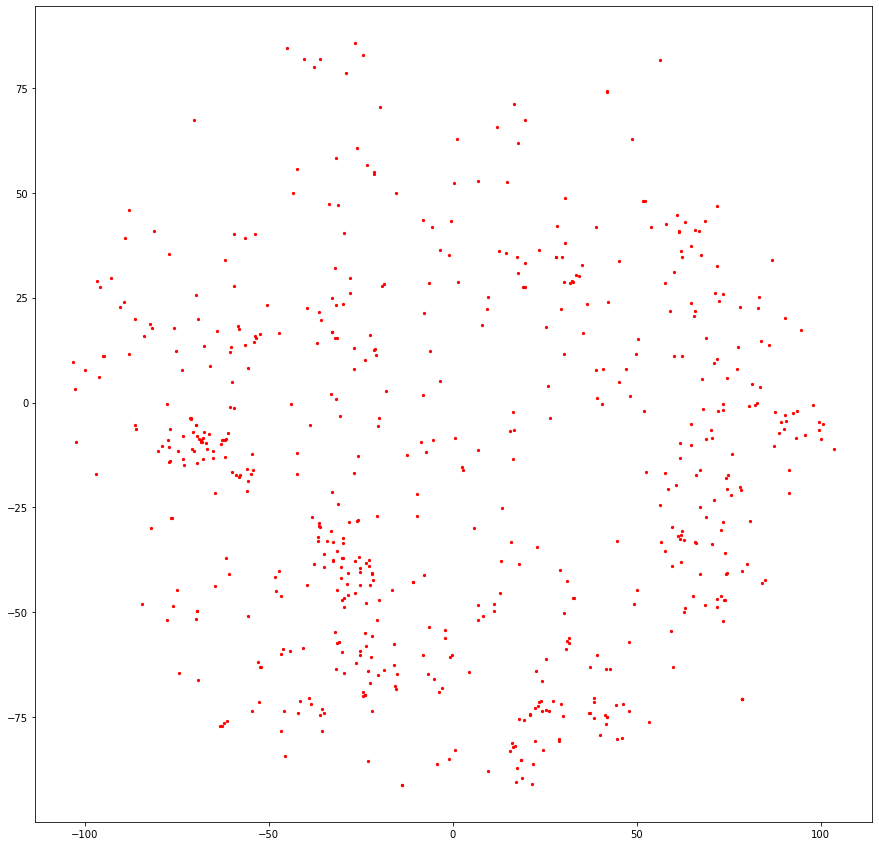

In [27]:
import random
k = 0.05

#plt.rcParams["figure.figsize"] = (9, 6)
plt.rcParams["figure.figsize"] = (15,15)

misinfo = np.where(video2_concat_2 == 1)[0]
non_misinfo = np.where(video2_concat_2 == 0)[0]

emb_misinfo_x = X_embedded_comment2[misinfo, 0]
emb_misinfo_y = X_embedded_comment2[misinfo, 1]
n = emb_misinfo_x.shape[0]
sampled_ind = random.sample([i for i in range(n)], int(n * k))
emb_misinfo_x = emb_misinfo_x[sampled_ind]
emb_misinfo_y = emb_misinfo_y[sampled_ind]

emb_nonmisinfo_x = X_embedded_comment2[non_misinfo, 0]
emb_nonmisinfo_y = X_embedded_comment2[non_misinfo, 1]
n = emb_nonmisinfo_x.shape[0]
sampled_ind = random.sample([i for i in range(n)], int(n * k))
emb_nonmisinfo_x = emb_nonmisinfo_x[sampled_ind]
emb_nonmisinfo_y = emb_nonmisinfo_y[sampled_ind]

plt.scatter(emb_misinfo_x, emb_misinfo_y, color='r', s=5)
#plt.scatter(emb_nonmisinfo_x, emb_nonmisinfo_y, color='b', s=5)

plt.show()